#  1. Importações e dados.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set_theme()

In [10]:
import pandas as pd

# Carregar a base original
df = pd.read_csv('/home/fause/ML-Transportes/PBIC/Etapa3/acidentes_pbic_2020_2025_Final.csv', encoding="utf-8")

df_acidentes = df.drop_duplicates(subset=["id", "pesid"]).copy()

df.tail()


/tmp/ipykernel_73059/493917375.py:4: DtypeWarning: Columns (32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/home/fause/ML-Transportes/PBIC/Etapa3/acidentes_pbic_2020_2025_Final.csv', encoding="utf-8")


,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,mes,dia_mes,hora,gravidade_numerica,total_vitimas,Marca_Principal,Modelo_Grupo,Nome_Modelo,Fabricante,Modelo
1678321,705809.0,1571785.0,2025-05-01,quinta-feira,19:50:00,SE,101.0,"98,6",SAO CRISTOVAO,Sim,...,5,1,19,0,0.0,Não Informado,Não Informado,NO,Não Informado,NO
1678322,705809.0,1571786.0,2025-05-01,quinta-feira,19:50:00,SE,101.0,"98,6",SAO CRISTOVAO,Sim,...,5,1,19,3,1.0,HONDA,CG 125 FAN ES,CG,HONDA,CG
1678323,705809.0,1571785.0,2025-05-01,quinta-feira,19:50:00,SE,101.0,"98,6",SAO CRISTOVAO,Sim,...,5,1,19,0,0.0,Não Informado,Não Informado,NO,Não Informado,NO
1678324,705883.0,1571987.0,2025-06-22,domingo,12:30:00,MG,354.0,764,ITAMONTE,Sim,...,6,22,12,1,1.0,HONDA,CB 650R,CB,HONDA,CB
1678325,705883.0,1571987.0,2025-06-22,domingo,12:30:00,MG,354.0,764,ITAMONTE,Sim,...,6,22,12,1,1.0,HONDA,CB 650R,CB,HONDA,CB


# Infos

In [11]:
print(df.columns)

Index(['id', 'pesid', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br',
       'km', 'municipio', 'causa_principal', 'causa_acidente',
       'ordem_tipo_acidente', 'tipo_acidente', 'classificacao_acidente',
       'fase_dia', 'sentido_via', 'condicao_metereologica', 'tipo_pista',
       'tracado_via', 'uso_solo', 'id_veiculo', 'tipo_veiculo', 'marca',
       'ano_fabricacao_veiculo', 'tipo_envolvido', 'estado_fisico', 'idade',
       'sexo', 'ilesos', 'feridos_leves', 'feridos_graves', 'mortos',
       'latitude', 'longitude', 'regional', 'delegacia', 'uop', 'ano_arquivo',
       'mes', 'dia_mes', 'hora', 'gravidade_numerica', 'total_vitimas',
       'Marca_Principal', 'Modelo_Grupo', 'Nome_Modelo', 'Fabricante',
       'Modelo'],
      dtype='object')


In [12]:
# Conta quantas vezes cada ID aparece
contagem_ids = df['id'].value_counts()

# IDs que aparecem mais de 1 vez (duplicados)
ids_duplicados = contagem_ids[contagem_ids > 1]

# IDs únicos (aparecem somente 1 vez)
ids_unicos = contagem_ids[contagem_ids == 1]

print("🔁 Quantidade de IDs repetidos:", len(ids_duplicados))
print("✅ Quantidade de IDs únicos:", len(ids_unicos))

# Se quiser ver os IDs duplicados e suas contagens:
print("\n📌 IDs repetidos (com contagem):")
print(ids_duplicados)

🔁 Quantidade de IDs repetidos: 291712
✅ Quantidade de IDs únicos: 76669

📌 IDs repetidos (com contagem):
id
368980.0    1470
452058.0     336
361615.0     330
595429.0     328
602168.0     300
            ... 
388137.0       2
503941.0       2
503945.0       2
503948.0       2
388149.0       2
Name: count, Length: 291712, dtype: int64


### Distribuição dos Acidentes por Tipo de Pista (id Unico)
Aqui verificamos quais tipos de pista concentram mais acidentes.


🚦 Distribuição de acidentes por tipo de pista:
    1. Simples: 301,895 acidentes
    2. Dupla: 249,768 acidentes
    3. Múltipla: 59,971 acidentes


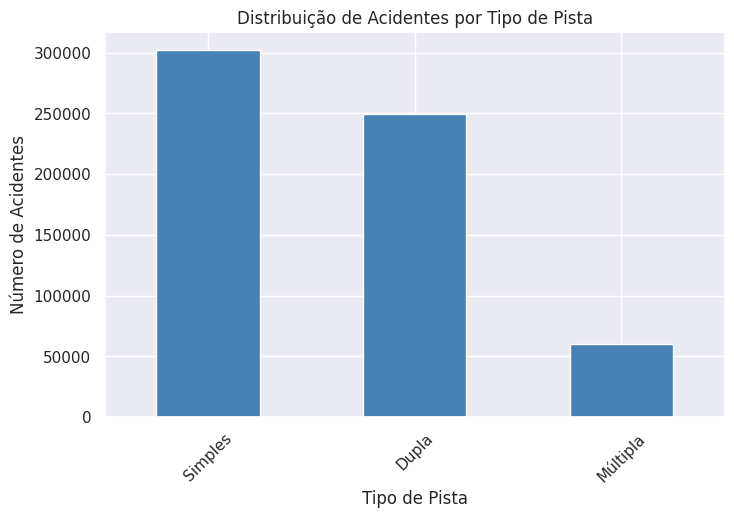

In [13]:
if 'tipo_pista' in df_acidentes.columns:
    pista_counts = df_acidentes['tipo_pista'].value_counts().head(10)

    print("🚦 Distribuição de acidentes por tipo de pista:")
    for i, (pista, qtd) in enumerate(pista_counts.items(), 1):
        print(f"   {i:2d}. {pista}: {qtd:,} acidentes")

    # Visualização
    pista_counts.plot(kind='bar', figsize=(8,5), color='steelblue')
    plt.title("Distribuição de Acidentes por Tipo de Pista")
    plt.xlabel("Tipo de Pista")
    plt.ylabel("Número de Acidentes")
    plt.xticks(rotation=45)
    plt.show()


# Tipo de Pista × Classificação do Acidente

🏷️ Top combinações Tipo de Pista × Classificação do Acidente:
   Simples - Com Vítimas Feridas: 224,323 acidentes
   Dupla - Com Vítimas Feridas: 194,546 acidentes
   Múltipla - Com Vítimas Feridas: 48,686 acidentes
   Simples - Sem Vítimas: 45,293 acidentes
   Dupla - Sem Vítimas: 43,374 acidentes
   Simples - Com Vítimas Fatais: 32,269 acidentes
   Dupla - Com Vítimas Fatais: 11,847 acidentes
   Múltipla - Sem Vítimas: 9,097 acidentes
   Múltipla - Com Vítimas Fatais: 2,188 acidentes


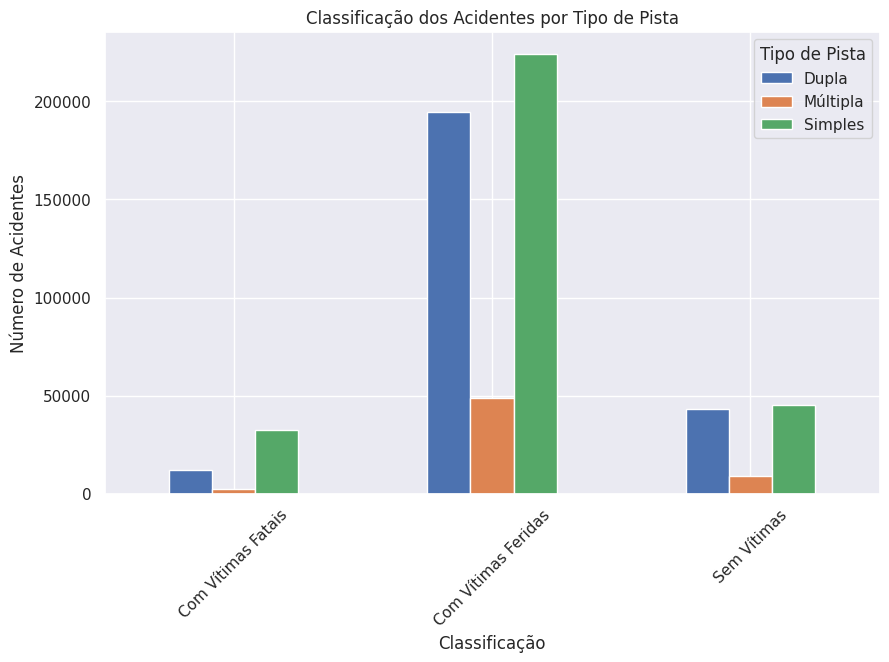

In [14]:
if 'tipo_pista' in df_acidentes.columns and 'classificacao_acidente' in df_acidentes.columns:
    class_pista = df_acidentes.groupby(['tipo_pista', 'classificacao_acidente']).size().reset_index(name='acidentes')
    top_class_pista = class_pista.sort_values('acidentes', ascending=False).head(15)

    print("🏷️ Top combinações Tipo de Pista × Classificação do Acidente:")
    for i, row in top_class_pista.iterrows():
        print(f"   {row['tipo_pista']} - {row['classificacao_acidente']}: {row['acidentes']:,} acidentes")

    # Visualização
    pivot = class_pista.pivot(index='classificacao_acidente', columns='tipo_pista', values='acidentes').fillna(0)
    pivot.plot(kind='bar', figsize=(10,6))
    plt.title("Classificação dos Acidentes por Tipo de Pista")
    plt.xlabel("Classificação")
    plt.ylabel("Número de Acidentes")
    plt.xticks(rotation=45)
    plt.legend(title="Tipo de Pista")
    plt.show()
